<a href="https://colab.research.google.com/github/pridnt/cesar_engdados/blob/master/notebooks/bankmarketing_naivebayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Descritiva

Ao longo deste notebook iremos explorar um dataset com o objetivo de efetuar análises estatísticas acerca dos dados da mesma.
Mais especificamente, trabalharemos com o data set de [dados bancários](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing#), disponibilizado na UCI.

## Preparação dos dados

In [0]:
## Bibliotecas que serão utilizadas durante a preparação dos dados

import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [80]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/cursos/cesar/engenharia_de_dados/estatistica_descritiva/data/bank-full.csv', sep=';')

print(df.head())
print(df.info())

   age           job  marital  education  ... pdays  previous poutcome   y
0   58    management  married   tertiary  ...    -1         0  unknown  no
1   44    technician   single  secondary  ...    -1         0  unknown  no
2   33  entrepreneur  married  secondary  ...    -1         0  unknown  no
3   47   blue-collar  married    unknown  ...    -1         0  unknown  no
4   33       unknown   single    unknown  ...    -1         0  unknown  no

[5 rows x 17 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
ca

In [0]:
# Ajustando o tipo dos dados
df['y'] = df['y'].astype('category')

In [0]:
# Para mantermos uma cópia dos dados base, vamos copiar os dados para outro dataframe
df_source = df

In [83]:
# Esta função é responsável por transformar os dados categóricos nominais em dados categóricos numéricos. 
# Dependendo do algoritmo que utilizaremos, esta etapa é essencial.
def categoriza(s):
    if s == 'yes':
       return 1
    elif s == 'no':
       return 0

# Tratando os dados categóricos do dataframe
df['class'] = df['y'].apply(categoriza)
df['default'] = df['default'].apply(categoriza)
df['housing'] = df['housing'].apply(categoriza)
df['loan'] = df['loan'].apply(categoriza)

df['class'] = df['class'].astype('int')
df['default'] = df['default'].astype('int')
df['housing'] = df['housing'].astype('int')
df['loan'] = df['loan'].astype('int')

df['class'].value_counts(normalize=True) * 100

0    88.30152
1    11.69848
Name: class, dtype: float64

In [0]:
# Transformando os dados nominais dos meses em dados numéricos

df.loc[df['month'] == 'jan', 'month'] = '1'
df.loc[df['month'] == 'feb', 'month'] = '2'
df.loc[df['month'] == 'mar', 'month'] = '3'
df.loc[df['month'] == 'apr', 'month'] = '4'
df.loc[df['month'] == 'may', 'month'] = '5'
df.loc[df['month'] == 'jun', 'month'] = '6'
df.loc[df['month'] == 'jul', 'month'] = '7'
df.loc[df['month'] == 'aug', 'month'] = '8'
df.loc[df['month'] == 'sep', 'month'] = '9'
df.loc[df['month'] == 'oct', 'month'] = '10'
df.loc[df['month'] == 'nov', 'month'] = '11'
df.loc[df['month'] == 'dec', 'month'] = '12'

df['month'] = df['month'].astype('int')

In [0]:
# Ao invés de termos apenas uma variável categórica com o estado civil do individuo, foram criadas três variáveis (flag) que determinam se 
# o indivíduo possui ou não àquela característica.

df['is_mar_divorced'] = 1
df.loc[df['marital'] != 'divorced', 'is_mar_divorced'] = 0

df['is_mar_single'] = 1
df.loc[df['marital'] != 'single', 'is_mar_single'] = 0

df['is_mar_married'] = 1
df.loc[df['marital'] != 'married', 'is_mar_married'] = 0

df['is_mar_divorced'] = df['is_mar_divorced'].astype('int')
df['is_mar_single'] = df['is_mar_single'].astype('int')
df['is_mar_married'] = df['is_mar_married'].astype('int')

In [0]:
# Transformando os dados nominais das categorias de emprego em dados numéricos

df.loc[df['job'] == 'admin.', 'job'] = '0'
df.loc[df['job'] == 'blue-collar', 'job'] = '1'
df.loc[df['job'] == 'entrepreneur', 'job'] = '2'
df.loc[df['job'] == 'housemaid', 'job'] = '3'
df.loc[df['job'] == 'management', 'job'] = '4'
df.loc[df['job'] == 'retired', 'job'] = '5'
df.loc[df['job'] == 'self-employed', 'job'] = '6'
df.loc[df['job'] == 'services', 'job'] = '7'
df.loc[df['job'] == 'student', 'job'] = '8'
df.loc[df['job'] == 'technician', 'job'] = '9'
df.loc[df['job'] == 'unemployed', 'job'] = '10'
df.loc[df['job'] == 'unknown', 'job'] = '11'

df['job'] = df['job'].astype('int')

In [0]:
# Ao invés de termos apenas uma variável categórica com o grau de instrução, foram criadas três variáveis (flag) que determinam se 
# o indivíduo possui ou não àquela característica.

df['is_edu_primary'] = 1
df.loc[df['education'] != 'primary', 'is_edu_primary'] = 0

df['is_edu_secondary'] = 1
df.loc[df['education'] != 'secondary', 'is_edu_secondary'] = 0

df['is_edu_tertiary'] = 1
df.loc[df['education'] != 'tertiary', 'is_edu_tertiary'] = 0

df['is_edu_unknown'] = 1
df.loc[df['education'] != 'unknown', 'is_edu_unknown'] = 0

df['is_edu_primary'] = df['is_edu_primary'].astype('int')
df['is_edu_secondary'] = df['is_edu_secondary'].astype('int')
df['is_edu_tertiary'] = df['is_edu_tertiary'].astype('int')
df['is_edu_unknown'] = df['is_edu_unknown'].astype('int')

In [0]:
# Transformando os dados nominais das categorias de contato em dados numéricos

df.loc[df['contact'] == 'cellular', 'contact'] = '0'
df.loc[df['contact'] == 'telephone', 'contact'] = '1'
df.loc[df['contact'] == 'unknown', 'contact'] = '2'

df['contact'] = df['contact'].astype('int')

In [0]:
# Transformando os dados nominais das categorias de poutcome em dados numéricos

df.loc[df['poutcome'] == 'failure', 'poutcome'] = '0'
df.loc[df['poutcome'] == 'other', 'poutcome'] = '1'
df.loc[df['poutcome'] == 'success', 'poutcome'] = '2'
df.loc[df['poutcome'] == 'unknown', 'poutcome'] = '3'

df['poutcome'] = df['poutcome'].astype('int')

**Identificando as variáveis**
- age: Quantitativa contínua
- job: Qualitativa discreta 
- default: Quantitativa contínua
- balance: Quantitativa contínua
- housing: Quantitativa contínua
- loan: Quantitativa contínua
- contact: Quantitativa contínua
- day: Quantitativa discreta
- month: Quantitativa discreta
- duration: Quantitativa discreta
- campaign: Quantitativa discreta
- pdays: Quantitativa discreta
- previous: Quantitativa discreta
- poutcome: Quantitativa contínua
- class: Quantitativa discreta
- is_mar_divorced: Quantitativa discreta 
- is_mar_single: Quantitativa discreta 
- is_mar_married: Quantitativa discreta 
- is_edu_primary: Quantitativa discreta 
- is_edu_secondary: Quantitativa discreta 
- is_edu_tertiary: Quantitativa discreta 
- is_edu_unknown: Quantitativa discreta 

In [13]:
# Verificando os tipos das colunas do dataframe após as alterações.
df.dtypes

# As alterações foram efetuadas com o objetivo de facilitar as análises dos dados. Para alguns algoritmos é muito mais fácil trabalhar com
# valores numéricos do que categóricos, como é o caso do Naive Bayes

age                    int64
job                    int64
marital               object
education             object
default                int64
balance                int64
housing                int64
loan                   int64
contact                int64
day                    int64
month                  int64
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome               int64
y                   category
class                  int64
is_mar_divorced        int64
is_mar_single          int64
is_mar_married         int64
is_edu_primary         int64
is_edu_secondary       int64
is_edu_tertiary        int64
is_edu_unknown         int64
dtype: object

In [14]:
# Verificando a existência de campos vazios

df.isnull().sum()

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
y                   0
class               0
is_mar_divorced     0
is_mar_single       0
is_mar_married      0
is_edu_primary      0
is_edu_secondary    0
is_edu_tertiary     0
is_edu_unknown      0
dtype: int64

In [0]:
# Uma vez que temos os dados base salvos em outro dataframe, no dataframe de trabalho efetuamos a exclusão das 
# colunas que não serão utilizadas na análise.

df =  df.drop(columns=['marital', 'education', 'y'])

## Limpeza e enriquecimento

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <a list of 10 Patch objects>)

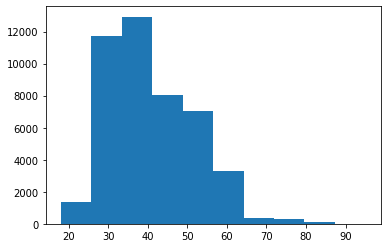

In [19]:
plt.hist([df.age])

- Remoção de outliers

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

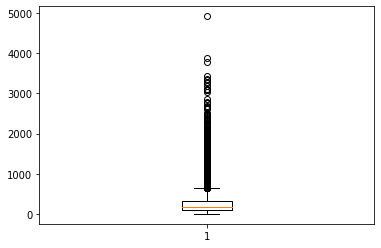

In [20]:
plt.boxplot([df.duration])
df['duration'].describe()

count    45210.000000
mean       258.060009
std        256.596426
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       3881.000000
Name: duration, dtype: float64

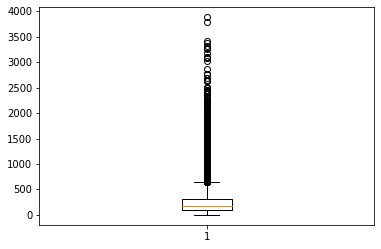

In [21]:
df2 = df.query('duration < 4918')
plt.boxplot([df2.duration])
df2['duration'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

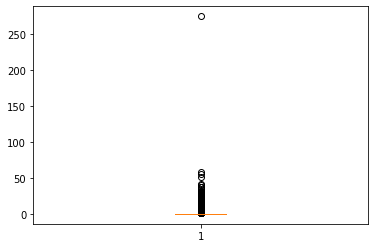

In [22]:
plt.boxplot([df.previous])
df['previous'].describe()

count    45209.000000
mean         0.574266
std          1.907947
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: previous, dtype: float64

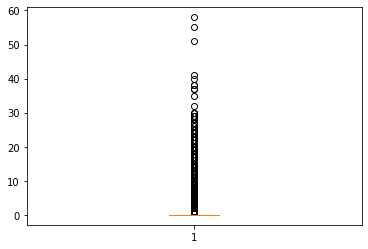

In [23]:
df2 = df.query('duration < 4918 and previous < 275')
plt.boxplot([df2.previous])
df2['previous'].describe()

In [24]:
df2.query('contact == 2')

,age,job,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,class,is_mar_divorced,is_mar_single,is_mar_married,is_edu_primary,is_edu_secondary,is_edu_tertiary,is_edu_unknown
0,58,4,0,2143,1,0,2,5,5,261,1,-1,0,3,0,0,0,1,0,0,1,0
1,44,9,0,29,1,0,2,5,5,151,1,-1,0,3,0,0,1,0,0,1,0,0
2,33,2,0,2,1,1,2,5,5,76,1,-1,0,3,0,0,0,1,0,1,0,0
3,47,1,0,1506,1,0,2,5,5,92,1,-1,0,3,0,0,0,1,0,0,0,1
4,33,11,0,1,0,0,2,5,5,198,1,-1,0,3,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,30,6,0,1031,0,0,2,20,10,7,1,-1,0,3,0,0,1,0,0,1,0,0
45062,58,5,0,742,0,0,2,20,10,5,1,-1,0,3,0,0,0,1,1,0,0,0
45122,40,2,0,262,1,1,2,26,10,17,1,-1,0,3,0,0,1,0,0,0,1,0
45135,53,1,0,1294,0,0,2,28,10,71,1,-1,0,3,0,0,0,1,1,0,0,0


**Separando por classe**

In [0]:
# Esta função efetua a separação dos indivíduos do dataset por classe
def separate_by_class(dataset):
  classes = np.unique(dataset['class'])

  separated = []
  for cl in classes:
    separated.append(dataset[dataset['class'] == cl])

  return separated

separated = separate_by_class(df)

**Análise gráfica**


In [0]:
# Análise geral de correlação após tratativa dos dados

print(df.corr())

                       age       job  ...  is_edu_tertiary  is_edu_unknown
age               1.000000 -0.021868  ...        -0.081629        0.069665
job              -0.021868  1.000000  ...         0.097562        0.023773
default          -0.017879 -0.006853  ...        -0.015239       -0.001236
balance           0.097783  0.018232  ...         0.084001        0.011181
housing          -0.185513 -0.125363  ...        -0.099175       -0.047595
loan             -0.015655 -0.033004  ...        -0.045940       -0.049992
contact           0.026221 -0.082063  ...        -0.141674        0.044070
day              -0.009120  0.022856  ...         0.021730        0.000114
month             0.092903  0.043142  ...         0.082121       -0.015071
duration         -0.004648  0.004744  ...         0.000891       -0.000682
campaign          0.004760  0.006839  ...         0.012866        0.005704
pdays            -0.023758 -0.024455  ...        -0.007568       -0.006907
previous          0.00128

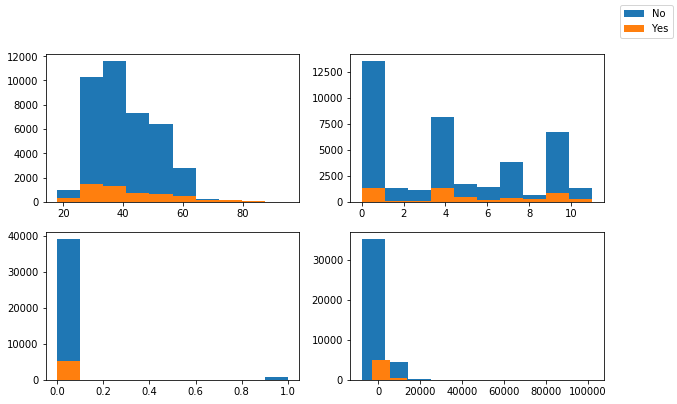

In [0]:
# Análise gráfica da correlação de cada uma das variáveis com as classes

fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0,0].hist(s['age'])
  ax[0,1].hist(s['job'])
  ax[1,0].hist(s['default'])
  ax[1,1].hist(s['balance'])
fig.legend(['No', 'Yes'])

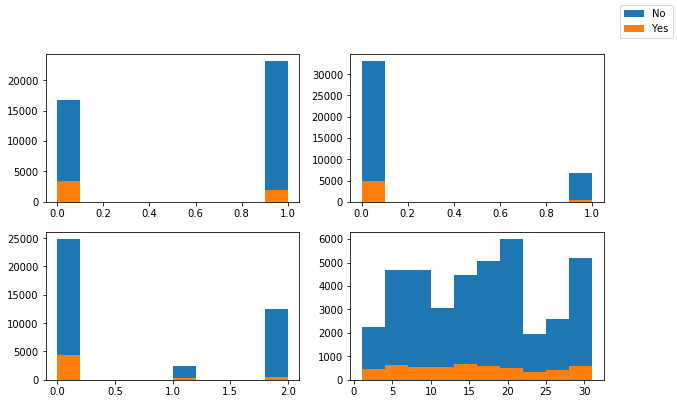

In [0]:
# Análise gráfica da correlação de cada uma das variáveis com as classes

fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0,0].hist(s['housing'])
  ax[0,1].hist(s['loan'])
  ax[1,0].hist(s['contact'])
  ax[1,1].hist(s['day'])
fig.legend(['No', 'Yes'])

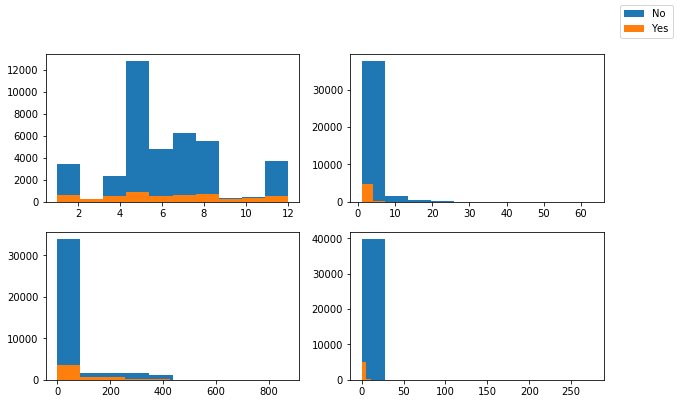

In [0]:
# Análise gráfica da correlação de cada uma das variáveis com as classes

fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0,0].hist(s['month'])
  ax[0,1].hist(s['campaign'])
  ax[1,0].hist(s['pdays'])
  ax[1,1].hist(s['previous'])
fig.legend(['No', 'Yes'])

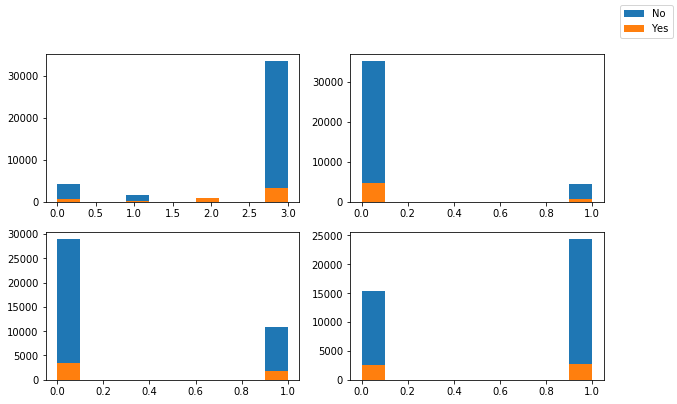

In [0]:
# Análise gráfica da correlação de cada uma das variáveis com as classes

fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0,0].hist(s['poutcome'])
  ax[0,1].hist(s['is_mar_divorced'])
  ax[1,0].hist(s['is_mar_single'])
  ax[1,1].hist(s['is_mar_married'])
fig.legend(['No', 'Yes'])

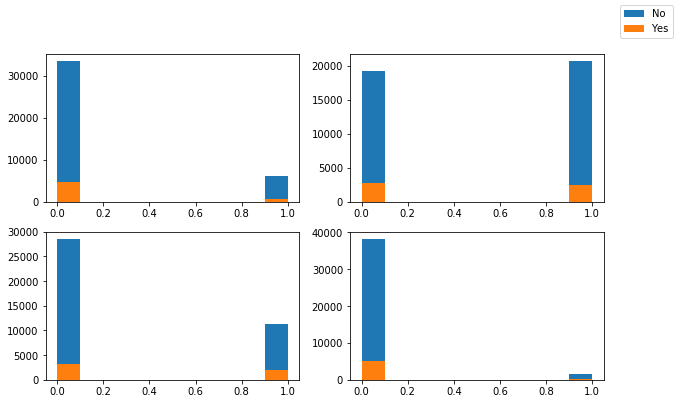

In [0]:
# Análise gráfica da correlação de cada uma das variáveis com as classes

fig,ax = plt.subplots(2,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0,0].hist(s['is_edu_primary'])
  ax[0,1].hist(s['is_edu_secondary'])
  ax[1,0].hist(s['is_edu_tertiary'])
  ax[1,1].hist(s['is_edu_unknown'])
fig.legend(['No', 'Yes'])

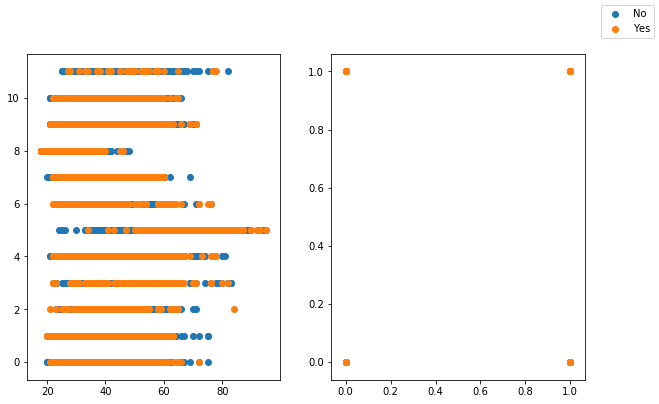

In [0]:
# Análise gráfica da correlação de tuplas de variáveis com as classes
# As variáveis foram escolhidas com base no resultado da análise gráfica individual e da correlação entre as variáveis

fig,ax = plt.subplots(1,2)
fig.set_size_inches(10,h=6)
for s in separated:
  ax[0].scatter(s['age'], s['job'])
  ax[1].scatter(s['housing'], s['loan'])
fig.legend(['No', 'Yes'])

**Sumarizando os dados**

Cálculo da média, desvio padrão e quantidade para cada coluna do dataset.


In [0]:
def summarize_dataset(dataset, eliminate_last=True):
  if eliminate_last:
    columns = dataset.columns[:-1]
  else:
    columns = dataset.columns
  summaries = [(np.mean(dataset[column]), np.std(dataset[column]), len(dataset[column])) for column in dataset.columns]
  del(summaries[-1])
  return summaries

summaries = summarize_dataset(df)

print(summaries)

[(40.93621021432837, 10.61864460472364, 45211), (4.339762447192055, 3.2726207277703194, 45211), (0.018026586450200173, 0.13304746758647717, 45211), (1362.2720576850766, 3044.732156139185, 45211), (0.5558381809736569, 0.4968723151329352, 45211), (0.16022649355245405, 0.366815981544525, 45211), (0.6402424188803609, 0.8979410280822167, 45211), (15.80641879188693, 8.322384112145135, 45211), (6.144655061821238, 2.4080073482929993, 45211), (258.1630797814691, 257.5249641835502, 45211), (2.763840658246887, 3.097986621286299, 45211), (40.19782796222158, 100.12763863509751, 45211), (0.5803233726305546, 2.3034155704475343, 45211), (2.559974342527261, 0.9890480941712163, 45211), (0.11698480458295547, 0.32140217808788435, 45211), (0.11517108668244454, 0.3192282999278385, 45211), (0.2828957554577426, 0.45040620222379935, 45211), (0.6019331578598128, 0.4894993680575177, 45211), (0.15153391873659064, 0.3585685293063276, 45211), (0.513193691800668, 0.4998258961845268, 45211), (0.29419831456946316, 0.4

Sumarizando dados por classe

In [0]:
def summarize_by_class(dataset):
  separated = separate_by_class(dataset)
  summaries = dict()
  for s in separated:
    class_value = np.array(s['class'])
    rows = s[s.columns]
    summaries[class_value[0]] = summarize_dataset(rows, eliminate_last=False)
  return summaries

summaries_by_class = summarize_by_class(df)
print(summaries_by_class)

{0: [(40.83898602274435, 10.17253468682594, 39922), (4.2915936075346925, 3.282457051164189, 39922), (0.019112268924402584, 0.1369196483378586, 39922), (1303.7149691899203, 2974.158222648996, 39922), (0.5810079655327889, 0.49339407122538725, 39922), (0.16933019387806222, 0.3750433032587752, 39922), (0.6887430489454436, 0.9165676274969025, 39922), (15.892289965432594, 8.294623722480742, 39922), (6.128250087670958, 2.356716892644691, 39922), (221.18280647262162, 207.38063981483725, 39922), (2.8463503832473322, 3.212727031742061, 39922), (36.421371674765794, 96.75592268105316, 39922), (0.5021542006913481, 2.2567430075270005, 39922), (2.587996593357046, 0.9812041501530779, 39922), (0.0, 0.0, 39922), (0.11484895546315314, 0.31883957234353655, 39922), (0.27248133861029006, 0.4452361830754207, 39922), (0.6126697059265568, 0.4871401619313087, 39922), (0.15680577125394518, 0.3636175481952366, 39922), (0.5198136365913532, 0.49960726556458795, 39922), (0.283177195531286, 0.45054175329511903, 39922

## Amostragem

Obs.: A amostra representa 10% da população, independentemente da abordagem utilizada

- Aleatória simples

In [16]:
sample1 = df.sample (frac =.10)

print(sample1.head())

       age  job  default  ...  is_edu_secondary  is_edu_tertiary  is_edu_unknown
39778   59    5        0  ...                 0                1               0
13388   44    1        0  ...                 1                0               0
36701   28    0        0  ...                 1                0               0
31581   28    9        0  ...                 0                1               0
45053   25    0        0  ...                 0                1               0

[5 rows x 22 columns]


- Primeiros 10%

In [17]:
sample2 = df.loc[1:4521]

print(sample2.head())

   age  job  default  ...  is_edu_secondary  is_edu_tertiary  is_edu_unknown
1   44    9        0  ...                 1                0               0
2   33    2        0  ...                 1                0               0
3   47    1        0  ...                 0                0               1
4   33   11        0  ...                 0                0               1
5   35    4        0  ...                 0                1               0

[5 rows x 22 columns]


- Por agrupamento

In [0]:
sample3 = df.loc[df['is_edu_unknown'] == 1]
sample4 = df.loc[df['is_edu_primary'] == 1]
sample5 = df.loc[df['is_edu_secondary'] == 1]
sample6 = df.loc[df['is_edu_tertiary'] == 1]

**Grupos**
- Grupo 1: população
- Grupo 2: amostragem aleatório de 10% da população
- Grupo 3: amostra dos primeiros 10% da população
- Grupo 4: amostragem por agrupamento (nível de escolaridade desconhecido)
- Grupo 5: amostragem por agrupamento (nível de escolaridade primário)
- Grupo 6: amostragem por agrupamento (nível de escolaridade secundário)
- Grupo 7: amostragem por agrupamento (nível de escolaridade superior)
- Grupo 8: população com exclusão de outliers


**Análises**
- Média, mediana
- Agrupadas (variância, desvio padrão, coeficiente de variação)

Obs.: optei por excluir a moda, pois se houver mais de uma moda uma exceção será lançada

In [0]:
def variance(x):
  m = x.mean()
  sz = len(x)
  var = np.sum(np.square(x-m))/sz

  return var

In [0]:
def standard_deviation(x):
  std = np.sqrt(variance(x))
  return std

In [0]:
def variance_coeficient(x):
  vc = standard_deviation(x)/x.mean()
  return vc

In [0]:
def analysis (df, item, metric):
  print('DADO ANALISADO: ' + item)
  print('INDICADOR ESTATISTICO: ' + metric)

  if metric == 'media':
    print('\tGrupo 1: % 5.2f' %(df[item].mean())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].mean())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].mean()))
    print('\tGrupo 4: % 5.2f' %(sample3[item].mean())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].mean())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].mean())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].mean())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].mean()))

    print('Valor do grupo - Valor de Clientes COM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(df[item].mean() - df[df['class'] == 1][item].mean())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].mean() - sample1[sample1['class'] == 1][item].mean())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].mean() - sample2[sample2['class'] == 1][item].mean())) 
    print('\tGrupo 4: % 5.2f' %(sample3[item].mean() - sample3[sample3['class'] == 1][item].mean())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].mean() - sample4[sample4['class'] == 1][item].mean())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].mean() - sample5[sample5['class'] == 1][item].mean())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].mean() - sample6[sample6['class'] == 1][item].mean())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].mean() - df2[df2['class'] == 1][item].mean())) 

    print('Valor do grupo - Valor de Clientes SEM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(df[item].mean() - df[df['class'] == 0][item].mean())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].mean() - sample1[sample1['class'] == 0][item].mean())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].mean() - sample2[sample2['class'] == 0][item].mean())) 
    print('\tGrupo 4: % 5.2f' %(sample3[item].mean() - sample3[sample3['class'] == 0][item].mean())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].mean() - sample4[sample4['class'] == 0][item].mean())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].mean() - sample5[sample5['class'] == 0][item].mean())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].mean() - sample6[sample6['class'] == 0][item].mean())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].mean() - df2[df2['class'] == 0][item].mean())) 

  elif metric == 'mediana':
    print('\tGrupo 1: % 5.2f' %(df[item].median())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].median())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].median()))
    print('\tGrupo 4: % 5.2f' %(sample3[item].median())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].median())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].median())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].median())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].median()))

    print('Valor do grupo - Valor de Clientes COM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(df[item].median() - df[df['class'] == 1][item].median())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].median() - sample1[sample1['class'] == 1][item].median())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].median() - sample2[sample2['class'] == 1][item].median())) 
    print('\tGrupo 4: % 5.2f' %(sample3[item].median() - sample3[sample3['class'] == 1][item].median())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].median() - sample4[sample4['class'] == 1][item].median())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].median() - sample5[sample5['class'] == 1][item].median())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].median() - sample6[sample6['class'] == 1][item].median())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].median() - df2[df2['class'] == 1][item].median())) 

    print('Valor do grupo - Valor de Clientes SEM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(df[item].median() - df[df['class'] == 0][item].median())) 
    print('\tGrupo 2: % 5.2f' %(sample1[item].median() - sample1[sample1['class'] == 0][item].median())) 
    print('\tGrupo 3: % 5.2f' %(sample2[item].median() - sample2[sample2['class'] == 0][item].median())) 
    print('\tGrupo 4: % 5.2f' %(sample3[item].median() - sample3[sample3['class'] == 0][item].median())) 
    print('\tGrupo 5: % 5.2f' %(sample4[item].median() - sample4[sample4['class'] == 0][item].median())) 
    print('\tGrupo 6: % 5.2f' %(sample5[item].median() - sample5[sample5['class'] == 0][item].median())) 
    print('\tGrupo 7: % 5.2f' %(sample6[item].median() - sample6[sample6['class'] == 0][item].median())) 
    print('\tGrupo 8: % 5.2f' %(df2[item].median() - df2[df2['class'] == 0][item].median())) 

  elif metric == 'variancia':
    print('\tGrupo 1: % 5.2f' %(variance(df[item]))) 
    print('\tGrupo 2: % 5.2f' %(variance(sample1[item]))) 
    print('\tGrupo 3: % 5.2f' %(variance(sample2[item])))
    print('\tGrupo 4: % 5.2f' %(variance(sample3[item]))) 
    print('\tGrupo 5: % 5.2f' %(variance(sample4[item]))) 
    print('\tGrupo 6: % 5.2f' %(variance(sample5[item]))) 
    print('\tGrupo 7: % 5.2f' %(variance(sample6[item]))) 
    print('\tGrupo 8: % 5.2f' %(variance(df2[item])))

    print('Valor do grupo - Valor de Clientes COM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(variance(df[item]) - variance(df[df['class'] == 1][item]))) 
    print('\tGrupo 2: % 5.2f' %(variance(sample1[item]) - variance(sample1[sample1['class'] == 1][item])))
    print('\tGrupo 3: % 5.2f' %(variance(sample2[item]) - variance(sample2[sample2['class'] == 1][item]))) 
    print('\tGrupo 4: % 5.2f' %(variance(sample3[item]) - variance(sample3[sample3['class'] == 1][item]))) 
    print('\tGrupo 5: % 5.2f' %(variance(sample4[item]) - variance(sample4[sample4['class'] == 1][item]))) 
    print('\tGrupo 6: % 5.2f' %(variance(sample5[item]) - variance(sample5[sample5['class'] == 1][item]))) 
    print('\tGrupo 7: % 5.2f' %(variance(sample6[item]) - variance(sample6[sample6['class'] == 1][item]))) 
    print('\tGrupo 8: % 5.2f' %(variance(df2[item]) - variance(df2[df2['class'] == 1][item]))) 

    print('Valor do grupo - Valor de Clientes SEM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(variance(df[item]) - variance(df[df['class'] == 0][item]))) 
    print('\tGrupo 2: % 5.2f' %(variance(sample1[item]) - variance(sample1[sample1['class'] == 0][item])))
    print('\tGrupo 3: % 5.2f' %(variance(sample2[item]) - variance(sample2[sample2['class'] == 0][item]))) 
    print('\tGrupo 4: % 5.2f' %(variance(sample3[item]) - variance(sample3[sample3['class'] == 0][item]))) 
    print('\tGrupo 5: % 5.2f' %(variance(sample4[item]) - variance(sample4[sample4['class'] == 0][item]))) 
    print('\tGrupo 6: % 5.2f' %(variance(sample5[item]) - variance(sample5[sample5['class'] == 0][item]))) 
    print('\tGrupo 7: % 5.2f' %(variance(sample6[item]) - variance(sample6[sample6['class'] == 0][item]))) 
    print('\tGrupo 8: % 5.2f' %(variance(df2[item]) - variance(df2[df2['class'] == 0][item]))) 

  elif metric == 'desvio_padrao':
    print('\tGrupo 1: % 5.2f' %(standard_deviation(df[item]))) 
    print('\tGrupo 2: % 5.2f' %(standard_deviation(sample1[item]))) 
    print('\tGrupo 3: % 5.2f' %(standard_deviation(sample2[item])))
    print('\tGrupo 4: % 5.2f' %(standard_deviation(sample3[item]))) 
    print('\tGrupo 5: % 5.2f' %(standard_deviation(sample4[item]))) 
    print('\tGrupo 6: % 5.2f' %(standard_deviation(sample5[item]))) 
    print('\tGrupo 7: % 5.2f' %(standard_deviation(sample6[item]))) 
    print('\tGrupo 8: % 5.2f' %(standard_deviation(df2[item])))

    print('Valor do grupo - Valor de Clientes COM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(standard_deviation(df[item]) - standard_deviation(df[df['class'] == 1][item]))) 
    print('\tGrupo 2: % 5.2f' %(standard_deviation(sample1[item]) - standard_deviation(sample1[sample1['class'] == 1][item])))
    print('\tGrupo 3: % 5.2f' %(standard_deviation(sample2[item]) - standard_deviation(sample2[sample2['class'] == 1][item]))) 
    print('\tGrupo 4: % 5.2f' %(standard_deviation(sample3[item]) - standard_deviation(sample3[sample3['class'] == 1][item]))) 
    print('\tGrupo 5: % 5.2f' %(standard_deviation(sample4[item]) - standard_deviation(sample4[sample4['class'] == 1][item]))) 
    print('\tGrupo 6: % 5.2f' %(standard_deviation(sample5[item]) - standard_deviation(sample5[sample5['class'] == 1][item]))) 
    print('\tGrupo 7: % 5.2f' %(standard_deviation(sample6[item]) - standard_deviation(sample6[sample6['class'] == 1][item]))) 
    print('\tGrupo 8: % 5.2f' %(standard_deviation(df2[item]) - standard_deviation(df2[df2['class'] == 1][item]))) 

    print('Valor do grupo - Valor de Clientes SEM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(standard_deviation(df[item]) - standard_deviation(df[df['class'] == 0][item]))) 
    print('\tGrupo 2: % 5.2f' %(standard_deviation(sample1[item]) - standard_deviation(sample1[sample1['class'] == 0][item])))
    print('\tGrupo 3: % 5.2f' %(standard_deviation(sample2[item]) - standard_deviation(sample2[sample2['class'] == 0][item]))) 
    print('\tGrupo 4: % 5.2f' %(standard_deviation(sample3[item]) - standard_deviation(sample3[sample3['class'] == 0][item]))) 
    print('\tGrupo 5: % 5.2f' %(standard_deviation(sample4[item]) - standard_deviation(sample4[sample4['class'] == 0][item]))) 
    print('\tGrupo 6: % 5.2f' %(standard_deviation(sample5[item]) - standard_deviation(sample5[sample5['class'] == 0][item]))) 
    print('\tGrupo 7: % 5.2f' %(standard_deviation(sample6[item]) - standard_deviation(sample6[sample6['class'] == 0][item]))) 
    print('\tGrupo 8: % 5.2f' %(standard_deviation(df2[item]) - standard_deviation(df2[df2['class'] == 0][item]))) 

  elif metric == 'coeficiente_variancia':
    print('\tGrupo 1: % 5.2f' %(variance_coeficient(df[item]))) 
    print('\tGrupo 2: % 5.2f' %(variance_coeficient(sample1[item]))) 
    print('\tGrupo 3: % 5.2f' %(variance_coeficient(sample2[item])))
    print('\tGrupo 4: % 5.2f' %(variance_coeficient(sample3[item]))) 
    print('\tGrupo 5: % 5.2f' %(variance_coeficient(sample4[item]))) 
    print('\tGrupo 6: % 5.2f' %(variance_coeficient(sample5[item]))) 
    print('\tGrupo 7: % 5.2f' %(variance_coeficient(sample6[item]))) 
    print('\tGrupo 8: % 5.2f' %(variance_coeficient(df2[item])))

    print('Valor do grupo - Valor de Clientes COM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(variance_coeficient(df[item]) - variance_coeficient(df[df['class'] == 1][item]))) 
    print('\tGrupo 2: % 5.2f' %(variance_coeficient(sample1[item]) - variance_coeficient(sample1[sample1['class'] == 1][item])))
    print('\tGrupo 3: % 5.2f' %(variance_coeficient(sample2[item]) - variance_coeficient(sample2[sample2['class'] == 1][item]))) 
    print('\tGrupo 4: % 5.2f' %(variance_coeficient(sample3[item]) - variance_coeficient(sample3[sample3['class'] == 1][item]))) 
    print('\tGrupo 5: % 5.2f' %(variance_coeficient(sample4[item]) - variance_coeficient(sample4[sample4['class'] == 1][item]))) 
    print('\tGrupo 6: % 5.2f' %(variance_coeficient(sample5[item]) - variance_coeficient(sample5[sample5['class'] == 1][item]))) 
    print('\tGrupo 7: % 5.2f' %(variance_coeficient(sample6[item]) - variance_coeficient(sample6[sample6['class'] == 1][item]))) 
    print('\tGrupo 8: % 5.2f' %(variance_coeficient(df2[item]) - variance_coeficient(df2[df2['class'] == 1][item]))) 

    print('Valor do grupo - Valor de Clientes SEM termo de deposito')
    print('\tGrupo 1: % 5.2f' %(variance_coeficient(df[item]) - variance_coeficient(df[df['class'] == 0][item]))) 
    print('\tGrupo 2: % 5.2f' %(variance_coeficient(sample1[item]) - variance_coeficient(sample1[sample1['class'] == 0][item])))
    print('\tGrupo 3: % 5.2f' %(variance_coeficient(sample2[item]) - variance_coeficient(sample2[sample2['class'] == 0][item]))) 
    print('\tGrupo 4: % 5.2f' %(variance_coeficient(sample3[item]) - variance_coeficient(sample3[sample3['class'] == 0][item]))) 
    print('\tGrupo 5: % 5.2f' %(variance_coeficient(sample4[item]) - variance_coeficient(sample4[sample4['class'] == 0][item]))) 
    print('\tGrupo 6: % 5.2f' %(variance_coeficient(sample5[item]) - variance_coeficient(sample5[sample5['class'] == 0][item]))) 
    print('\tGrupo 7: % 5.2f' %(variance_coeficient(sample6[item]) - variance_coeficient(sample6[sample6['class'] == 0][item]))) 
    print('\tGrupo 8: % 5.2f' %(variance_coeficient(df2[item]) - variance_coeficient(df2[df2['class'] == 0][item]))) 

In [67]:
variables = ['age']#, 'balance', 'campaign', 'pdays', 'previous']
metrics = ['media', 'mediana', 'variancia', 'desvio_padrao', 'coeficiente_variancia']

for variable in variables:
  for metric in metrics:
    analysis(df, variable, metric)

DADO ANALISADO: age
INDICADOR ESTATISTICO: media
	Grupo 1:  40.94
	Grupo 2:  40.87
	Grupo 3:  40.88
	Grupo 4:  44.51
	Grupo 5:  45.87
	Grupo 6:  39.96
	Grupo 7:  39.59
	Grupo 8:  40.94
Valor do grupo - Valor de Clientes COM termo de deposito
	Grupo 1: -0.73
	Grupo 2: -1.17
	Grupo 3:  0.50
	Grupo 4: -0.86
	Grupo 5: -5.74
	Grupo 6: -0.69
	Grupo 7:  0.08
	Grupo 8: -0.73
Valor do grupo - Valor de Clientes SEM termo de deposito
	Grupo 1:  0.10
	Grupo 2:  0.15
	Grupo 3: -0.02
	Grupo 4:  0.14
	Grupo 5:  0.54
	Grupo 6:  0.08
	Grupo 7: -0.01
	Grupo 8:  0.10
DADO ANALISADO: age
INDICADOR ESTATISTICO: mediana
	Grupo 1:  39.00
	Grupo 2:  39.00
	Grupo 3:  41.00
	Grupo 4:  45.00
	Grupo 5:  45.00
	Grupo 6:  38.00
	Grupo 7:  37.00
	Grupo 8:  39.00
Valor do grupo - Valor de Clientes COM termo de deposito
	Grupo 1:  1.00
	Grupo 2:  1.00
	Grupo 3:  1.00
	Grupo 4:  1.00
	Grupo 5: -5.00
	Grupo 6:  0.00
	Grupo 7:  1.00
	Grupo 8:  1.00
Valor do grupo - Valor de Clientes SEM termo de deposito
	Grupo 1:  0.00


## Probabilidade Gaussiana

In [0]:
def calculate_probability(x, mean, stdev):
	exponent = np.exp(-((x-mean)**2 / (2 * stdev**2 )))
	return (1 / (np.sqrt(2 * np.pi) * stdev)) * exponent

In [0]:
Distribuição por feature

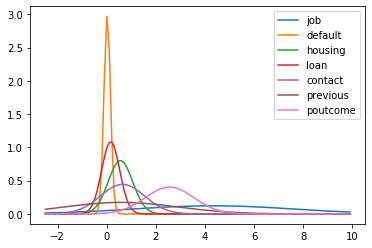

In [0]:
x = np.arange(-2.5,10,0.1)
for summ in summaries:
  if summaries.index(summ) in (1, 2, 4, 5, 6, 12, 13):
    y = calculate_probability(x, summ[0], summ[1])
    plt.plot(x,y)

plt.legend(['job', 'default', 'housing', 'loan', 'contact', 'previous', 'poutcome'])


Distribuição de feature por classe

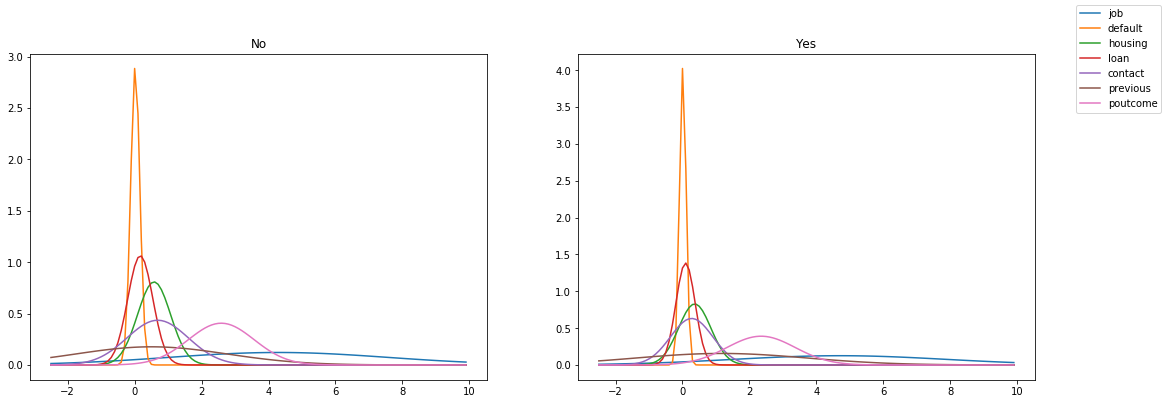

In [0]:
n_classes = len(summaries_by_class)
fig,ax = plt.subplots(1,n_classes)
fig.set_size_inches(18, h=6)

classes_name = ['No', 'Yes']
for c in range(n_classes):
  for summ in summaries_by_class[c]:
    if summaries_by_class[c].index(summ) in (1, 2, 4, 5, 6, 12, 13):
      ax[c].plot(x, calculate_probability(x, summ[0], summ[1]))
  ax[c].set_title(classes_name[c])

fig.legend(['job', 'default', 'housing', 'loan', 'contact', 'previous', 'poutcome'])


Cálculo percentual da acurácia

In [0]:
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

Cálculo da probabilidade de predição

In [0]:
def calculate_class_probabilities(summaries, row):
  total_rows = sum([summaries[label][0][2] for label in summaries])
  probabilities = dict()
  for class_value, class_summaries in summaries.items():
    probabilities[class_value] = summaries[class_value][0][2]/float(total_rows)
    for i in range(len(class_summaries)):
      mean, stdev, count = class_summaries[i]
      probabilities[class_value] *= calculate_probability(row[i], mean, stdev)
  return probabilities

Predição da classe para uma determinada linha

In [0]:
def predict(summaries, row):

	probabilities = calculate_class_probabilities(summaries, row)
	best_label, best_prob = None, -1
	for class_value, probability in probabilities.items():
		if best_label is None or probability > best_prob:
			best_prob = probability
			best_label = class_value
	return best_label

Dividindo o dataset

In [0]:
def split(dataset):
  sz = dataset.shape[0]
  sh = np.arange(sz)
  np.random.shuffle(sh)
  vec = np.zeros((sz),dtype=bool)
  vec[sh[:int(sz*0.75)]] = True
  train = dataset.loc[vec]
  test = dataset.loc[~vec]

  return train, test

In [0]:
train,test = split(df)

## Naive Bayes

In [0]:
# Naive Bayes Algorithm
def naive_bayes(train, test):
  summarize = summarize_by_class(train)
  predictions = list()
  vec = np.zeros(test.shape[0], dtype=bool)
  for i in range(test.shape[0]):
    vec[i] = True
    row = np.array(test.loc[vec])[0]
    output = predict(summarize, row)
    predictions.append(output)
    vec[i] = False
  return(predictions)

In [0]:
predictions = naive_bayes(train,test)

print(predictions)
actual = np.array(test['class'])
print(actual)

print('Accuracy ', accuracy_metric(actual, predictions))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [0]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
pred = gnb.fit(np.array(train[train.columns[:4]]), np.array(train['class'])).predict(np.array(test[test.columns[:4]]))

print(accuracy_metric(actual, pred))

87.11846412456869


## Teste de hipóteses

In [0]:
import scipy.stats as st
import numpy as np

In [0]:
def calc_z0(xm, mi, sigma, n):
  return (xm - mi)/(sigma/np.sqrt(n))

In [0]:
def decision_normal(z0, alpha, unilateral=True, right=True):
  p = st.norm.cdf(z0)
  if unilateral:
    if right:
      reject = (p > (1.0 - alpha))
    else:
      reject = (p < alpha)
  else:
    reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

  return reject

In [0]:
def calc_t0(xm, mi, s, n):
  return (xm - mi)/(s/np.sqrt(n))

In [0]:
def decision_tstudent(t0, alpha, df, unilateral=True, right=True):
  p = st.t.cdf(t0, df)
  if unilateral:
    if right:
      reject = (p > (1.0 - alpha))
    else:
      reject = (p < alpha)
  else:
    reject = ((p < (alpha/2)) | (p > (1.0 - alpha/2)))

  return reject

**T student**

Coletando amostras

In [75]:
df_deposit_yes = df[df['class'] == 1]

p_deposit_yes = len(df_deposit_yes)/len(df)

print(p_deposit_yes)

0.11698480458295547


Verificamos que 11.7% da população subscreveu um termo de depósito

**Afirmação:** A proporção de indivíduos com termo de depósito é maior que 11%.

In [0]:
n = 20 # tamanho da amostra
gl = n - 1 # graus de liberdade
p_deposit_yes_sample = np.zeros((n,))

for i in range(20):
  sample = np.arange(len(df))
  np.random.shuffle(sample)

  df_sample = df.loc[sample[:int(20)]]

  df_deposit_yes_sample = df_sample[df_sample['class'] == 1]

  p_deposit_yes_sample[i] = len(df_deposit_yes_sample)/len(df_sample)

s_deposit_yes_sample = np.std(p_deposit_yes_sample)

Teste da hipótese

In [120]:
t0 = calc_t0(np.mean(p_deposit_yes_sample), 0.11, s_deposit_yes_sample, n)
#print('t0 = ', t0)
#print(st.t.cdf(t0, df)) # cumulative distribuition function

alpha = 0.05
reject = decision_tstudent(t0, alpha, gl, unilateral=True, right=True)

if(reject):
  print('H_0 rejeitada')
  print('A proporção de indivíduos com termo de depósito é maior que 11%')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que a proporção de indivíduos com termo de depósito é maior que 11%')

H_0 não rejeitada
Não há evidência que a proporção de indivíduos com termo de depósito é maior que 11%


**Normal**

Coletando amostras

In [170]:
df_deposit_yes_sample = df[df['class'] == 1].sample (frac =.10)

n = len(df_deposit_yes_sample)
xm = df_deposit_yes_sample['previous'].mean()
s = np.std(df_deposit_yes_sample['previous'])
mi = df['previous'].mean()

print('Tamanho da amostra: ' + str(n))
print('Média de contatos da amostra: ' + str(xm))
print('Desvio padrão de contatos da amostra: ' + str(s))
print('Média de contatos da população: ' + str(mi))

Tamanho da amostra: 529
Média de contatos da amostra: 1.0926275992438563
Desvio padrão de contatos da amostra: 2.2535253825056953
Média de contatos da população: 0.5803233726305546


Verificamos que a média de contatos por indivíduo é de 0.58. Vamos verificar a hipótese de que a média de contatos para indivíduos que possuem termo de depósito é de 1.08, com nível de significância de 0.05.

In [171]:
alpha = 0.05
sigma = s # Como n >= 30 podemos usar a normal

z0 = calc_z0(xm, mi, sigma, n)
reject = decision_normal(z0, alpha, unilateral=False)
if(reject):
  print('H_0 rejeitada')
  print('A média de contatos para indivíduos que possuem termo de depósito não é de 1.08')
else:
  print('H_0 não rejeitada')
  print('Não há evidência que a média de contatos para indivíduos que possuem termo de depósito não é de 1.08')

H_0 rejeitada
A média de contatos para indivíduos que possuem termo de depósito não é de 1.08
